## Multilayer Perceptron

In [1]:
#Clue 1
def plot_decision_boundary(X, target, w_input_hidden, w_hidden_output):
    h = .02  #Clue 2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    grid_input = np.c_[xx.ravel(), yy.ravel()]
    Z = np.array(mlp_predict(grid_input, w_input_hidden, w_hidden_output))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=target, cmap=plt.cm.Spectral)
    plt.show()

Berikut adalah kode Multilayer Perceptron.  
Tugas Praktikan adalah melengkapi kode tersebut.
- Buat fungsi aktivasi step (binary) bernama percep_step().
- Buatlah fungsi aktivasi sigmoid bernama sigmoid().
- Lengkapi model Multilayer Perceptron bernama mlp_fit().
- Lengkapi prediksi bernama mlp_predict().
- Ubah format input menjadi matriks 2D menggunakan numpy.

In [2]:
import numpy as np

# Clue 1
def percep_step(input, th=0):
    return 1 if input >= th else -1

# Clue 2
def sigmoid(x, derivative=False):
    if derivative:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

def mlp_fit(X, target, hidden_size, learning_rate=0.1, max_epoch=-1, verbose=False):
    input_size = len(X[0])
    output_size = len(target[0])

    # Clue 3
    w_input_hidden = 2 * np.random.random((input_size, hidden_size)) - 1
    # Clue 4
    w_hidden_output = 2 * np.random.random((hidden_size, output_size)) - 1

    epoch = 0

    while max_epoch == -1 or epoch < max_epoch:
        epoch += 1

        if verbose:
            print('\nEpoch', epoch)

        for i, x in enumerate(X):
            # Clue 5
            hidden_input = np.dot(x, w_input_hidden)
            hidden_output = sigmoid(hidden_input)

            # Clue 6
            output_input = np.dot(hidden_output, w_hidden_output)
            output = percep_step(output_input)

            # Clue 7
            error = target[i] - output
            delta_output = error * sigmoid(output_input, derivative=True)
            error_hidden = delta_output.dot(w_hidden_output.T)
            delta_hidden = error_hidden * sigmoid(hidden_input, derivative=True)

            w_hidden_output += hidden_output.reshape(-1, 1) @ delta_output.reshape(1, -1) * learning_rate
            w_input_hidden += x.reshape(-1, 1) @ delta_hidden.reshape(1, -1) * learning_rate

        if verbose:
            print('Bobot Input-Hidden:', w_input_hidden)
            print('Bobot Hidden-Output:', w_hidden_output)

    return w_input_hidden, w_hidden_output, epoch

def mlp_predict(X, w_input_hidden, w_hidden_output, th=0):
    Y = []
    for x in X:
        # Clue 8
        hidden_input = np.dot(x, w_input_hidden)
        hidden_output = sigmoid(hidden_input)
        # Clue 9
        output_input = np.dot(hidden_output, w_hidden_output)
        y = percep_step(output_input, th)

        Y.append(y)

    return Y

def calc_accuracy(y_true, y_pred):
    s = [1 if y_true[i] == y_pred[i] else 0 for i in range(len(y_true))]
    accuracy = sum(s) / len(y_true)
    return accuracy


Epoch 1
Bobot Input-Hidden: [[ 0.30299203  0.77945602  0.06794216  0.51740592]
 [ 0.05576569  0.14669781  0.4138911  -0.63670162]]
Bobot Hidden-Output: [[ 0.25645034]
 [-0.20420445]
 [ 0.64767242]
 [-0.71702995]]

Epoch 2
Bobot Input-Hidden: [[ 0.30003447  0.78734673  0.07342328  0.58407768]
 [ 0.05872326  0.1388071   0.40840997 -0.70337338]]
Bobot Hidden-Output: [[ 0.24004947]
 [-0.21717854]
 [ 0.62576869]
 [-0.72599661]]

Epoch 3
Bobot Input-Hidden: [[ 0.2974201   0.79578901  0.07849178  0.66181408]
 [ 0.06133762  0.13036482  0.40334148 -0.78110977]]
Bobot Hidden-Output: [[ 0.22405302]
 [-0.22966113]
 [ 0.60457264]
 [-0.73386042]]

Epoch 4
Bobot Input-Hidden: [[ 0.29506233  0.80486213  0.08307771  0.75364838]
 [ 0.06361404  0.12131649  0.3985173  -0.87309874]]
Bobot Hidden-Output: [[ 0.20791833]
 [-0.24228378]
 [ 0.58346943]
 [-0.74101773]]

Epoch 5
Bobot Input-Hidden: [[ 0.29269649  0.81475451  0.08617055  0.86164077]
 [ 0.06520692  0.11169184  0.39307018 -0.98269256]]
Bobot Hidden

<ipython-input-2-b1b557444743>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Streaming output truncated to the last 5000 lines.
 [ -1.50319738]]

Epoch 377
Bobot Input-Hidden: [[-1.05052283e+06 -1.14074058e+03 -1.14233618e+05 -1.15457673e+16]
 [-1.05052305e+06 -1.14152040e+03 -1.14233331e+05 -1.15457673e+16]]
Bobot Hidden-Output: [[-11.11111213]
 [-31.72187126]
 [-10.12821241]
 [ -1.50319738]]

Epoch 378
Bobot Input-Hidden: [[-1.05052283e+06 -1.14074058e+03 -1.14233618e+05 -1.15457673e+16]
 [-1.05052305e+06 -1.14152040e+03 -1.14233331e+05 -1.15457673e+16]]
Bobot Hidden-Output: [[-11.11111213]
 [-31.72187126]
 [-10.12821241]
 [ -1.50319738]]

Epoch 379
Bobot Input-Hidden: [[-1.05052283e+06 -1.14074058e+03 -1.14233618e+05 -1.15457673e+16]
 [-1.05052305e+06 -1.14152040e+03 -1.14233331e+05 -1.15457673e+16]]
Bobot Hidden-Output: [[-11.11111213]
 [-31.72187126]
 [-10.12821241]
 [ -1.50319738]]

Epoch 380
Bobot Input-Hidden: [[-1.05052283e+06 -1.14074058e+03 -1.14233618e+05 -1.15457673e+16]
 [-1.05052305e+06 -1.14152040e+03 -1.14233331e+05 -1.15457673e+16]]
Bobot Hidd

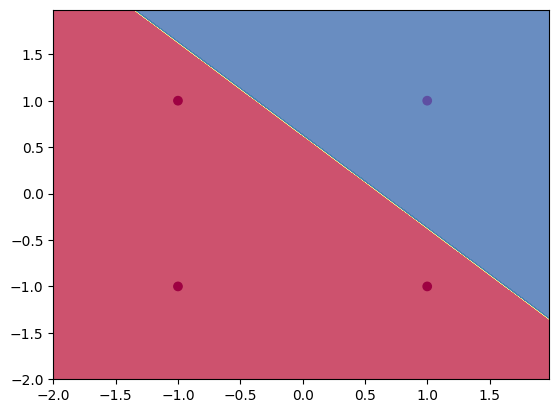

In [3]:
# Clue 1
import matplotlib.pyplot as plt
# Clue 2
# Clue 3
train = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])
target = np.array([[1], [-1], [-1], [-1]])

w_input_hidden, w_hidden_output, epoch = mlp_fit(train, target, hidden_size=4, learning_rate=0.1, max_epoch=1000, verbose=True)
output = np.array(mlp_predict(train, w_input_hidden, w_hidden_output))
accuracy = calc_accuracy(target, output)
print('Epochs:', epoch)
print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)

plot_decision_boundary(train, target, w_input_hidden, w_hidden_output)
